<img src="logo-cefet.png" width="300">

<h1> PPCIC Dissertação - 2021/2022
    <br>
    <br>
    DETECÇÃO DE EVENTOS ADVERSOS ATRAVÉS DO TWITTER UTILIZANDO O METAMAP PARA O PORTUGUÊS DO BRASIL </h1>
</br>

<h2> Matéria: CIC1229 - TÓPICOS ESPECIAIS EM ALGORITMOS </h2>
<h2> Aluno: Perciliano </h2>
<h2> Orientadora: Kele Belloze </h2>
<h3> Data: 13/06/2022 </h3>

---

**Autor: Luiz Perciliano** - 
***luiz.perciliano@eic.cefet-rj.br***


<b>Dados da pesquisa na base SCOPUS (541) e PubMed (188) - 729 documentos para análise</b>

**A Fazer**

1. [ ] Criado projeto no git para Fork e acompanhamento do Will
1. [ ] 6+ - Há um documento que não foi necessário baixar PDF, verificar este
1. [ ] Ler novos documentos
1. [ ] Analisr biblioteca Python do MetaMap
1. [ ] Reinstalar do zero o Metamap
1. [ ] Artigos sem abstract serão deixados por último
1. [ ] Melhorar busca de massa de dados no Twitter com o Knime
1. [ ] Ajustar / rodar MetaMap com nova massa de dados

---

[Projeto no GitHub](https://github.com/LuizPerciliano/Evento-Adverso-com-Metamap-e-Twitter-com-Portugues-Brasil)

[Site da dissertação](https://www.overleaf.com/read/rtybccmfvfr7)

[Manual de instalação do Metamap DFB 2021](https://www.overleaf.com/read/jsyhtqwwgccz)

# Preparar Infraesrtutura

In [1]:
print(f'Importar as bibliotecas necessárias e mapear a pasta do projeto.')
import os, re
import sys
import pandas as pd
import datetime
#import numpy as np
import seaborn as sns

import nltk
#nltk.download()
from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

#from googletrans import Translator
from google_trans_new import google_translator

Importar as bibliotecas necessárias e mapear a pasta do projeto.


In [2]:
data_inicio = pd.Timestamp.now()
print(f'Iniciando o programa em: {data_inicio}')

Iniciando o programa em: 2022-06-21 23:56:04.602865


## Verificar, atualizar e instalar se necessário python e módulos

In [ ]:
## versao 3,9,0 estava funcionando
print('Local de instalação do Python:       ',sys.executable)
print('Versão do Python instalado e em uso: ',sys.version)
print('Informações da versão do Python:     ',sys.version_info)
print(f'Quantidade de CPU:                   {os.cpu_count()}')

In [ ]:
print('Atualizando os módulos Python.')
#!pip install --upgrade pip

In [ ]:
print('Instalando os módulos necessários.')
# print('')
#!pip install Unidecode -q
#!pip install sklearn
#!pip install wordcloud
#!pip install wget
#!pip install opencv-python #import cv2
#!pip install wand #wand=0.6.5
#!pip install jupyter_contrib_nbextensions
#!pip install pip-chill ## para verificar todos os mõdulos instalados para uma nova instalacao

In [54]:
print(f'Lista do conteúdo da pasta ...')
os.listdir(os.path.join('..','data'))

Lista do conteúdo da pasta ...


['base-qualis-06-06-2021.xlsx',
 'bases_filtradas-completa-14-06-2022.xlsx',
 'bases_filtradas-resumida-14-06-2022.xlsx',
 'bases_filtradas_traduzida-26-09-2021.xlsx',
 'bkp',
 'pubmed-csv-naturallan-set-2022.csv',
 'pubmed.csv',
 'PubMed_Timeline_Results_by_Year-10-06-2021.csv',
 'requiremets.txt',
 'scopus-31-05-2022.csv',
 'scopus.csv',
 'stop_word_projeto.csv',
 'stop_word_pt.csv']

In [ ]:
pd.set_option("max_colwidth", 200)

# Carga - Base Qualis

# Carga - Base Scopus

In [3]:
print('Visualização do dataframe carregado da base scopus.')
arquivo_base_scopus = os.path.join('../data','scopus-31-05-2022.csv')
raw_data_scopus = pd.read_csv(arquivo_base_scopus, sep=",", delimiter=None, encoding='utf-8')
raw_data_scopus.head(3)

Visualização do dataframe carregado da base scopus.


,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Aronson A.R.,17933416200;,Effective mapping of biomedical text to the UM...,2001,Proceedings / AMIA ... Annual Symposium. AMIA ...,NaN,NaN,NaN,17,21,...,NaN,NaN,11825149.0,English,Proc AMIA Symp,Article,Final,NaN,Scopus,2-s2.0-0035752429
1,"Kuhn M., Letunic I., Jensen L.J., Bork P.",35345083400;6602771600;35548941900;7103061421;,The SIDER database of drugs and side effects,2016,Nucleic Acids Research,44,D1,NaN,D1075,D1079,...,NaN,NARHA,26481350.0,English,Nucleic Acids Res.,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-84979503522
2,"Nikfarjam A., Sarker A., O'Connor k., Ginn R.,...",36069663700;36976315000;56596185000;5659652430...,Pharmacovigilance from social media: Mining ad...,2015,Journal of the American Medical Informatics As...,22,3,NaN,671,681,...,NaN,JAMAF,25755127.0,English,J. Am. Med. Informatics Assoc.,Article,Final,"All Open Access, Hybrid Gold, Green",Scopus,2-s2.0-84927943705


## Análise base SCOPUS

In [4]:
print('Verificando tipos e se tem dados nulos')
raw_data_scopus.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        541 non-null    object 
 1   Author(s) ID                   541 non-null    object 
 2   Title                          541 non-null    object 
 3   Year                           541 non-null    int64  
 4   Source title                   541 non-null    object 
 5   Volume                         454 non-null    object 
 6   Issue                          236 non-null    object 
 7   Art. No.                       145 non-null    object 
 8   Page start                     407 non-null    object 
 9   Page end                       396 non-null    object 
 10  Page count                     3 non-null      float64
 11  Cited by                       454 non-null    float64
 12  DOI        

In [5]:
raw_data_scopus.nunique()

Authors                          525
Author(s) ID                     521
Title                            539
Year                              23
Source title                     196
Volume                           188
Issue                             37
Art. No.                         141
Page start                       316
Page end                         325
Page count                         3
Cited by                          81
DOI                              442
Link                             541
Affiliations                     528
Authors with affiliations        536
Abstract                         530
Author Keywords                  375
Index Keywords                   492
Molecular Sequence Numbers         0
Chemicals/CAS                     85
Tradenames                        18
Manufacturers                      2
Funding Details                  259
Funding Text 1                   247
Funding Text 2                    29
Funding Text 3                     3
F

In [6]:
# verificar campos nulos
raw_data_scopus.isnull().sum()

Authors                            0
Author(s) ID                       0
Title                              0
Year                               0
Source title                       0
Volume                            87
Issue                            305
Art. No.                         396
Page start                       134
Page end                         145
Page count                       538
Cited by                          87
DOI                               99
Link                               0
Affiliations                       4
Authors with affiliations          3
Abstract                           0
Author Keywords                  166
Index Keywords                    49
Molecular Sequence Numbers       541
Chemicals/CAS                    424
Tradenames                       521
Manufacturers                    539
Funding Details                  267
Funding Text 1                   293
Funding Text 2                   512
Funding Text 3                   538
F

In [7]:
# Copiar dataframe para ajustes
df_scopus = raw_data_scopus.copy()

In [8]:
## Verificar se os dataframes nao s"ao espelhos
print(id(df_scopus),id(raw_data_scopus))

1868939575248 1868939567664


## Manutenção de colunas

In [9]:
# Ajustar de Colunas
'''
Em relação ao arquivo passado, foram incluídas as colunas:

'Funding Text 4','Funding Text 5', 'Funding Text 6', 'Funding Text 7', 'Funding Text 8','Funding Text 9',
'Funding Text 10'
'''
print('Verificar colunas')
df_scopus.columns

Verificar colunas


Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Abstract',
       'Author Keywords', 'Index Keywords', 'Molecular Sequence Numbers',
       'Chemicals/CAS', 'Tradenames', 'Manufacturers', 'Funding Details',
       'Funding Text 1', 'Funding Text 2', 'Funding Text 3', 'Funding Text 4',
       'Funding Text 5', 'Funding Text 6', 'Funding Text 7', 'Funding Text 8',
       'Funding Text 9', 'Funding Text 10', 'References',
       'Correspondence Address', 'Editors', 'Sponsors', 'Publisher',
       'Conference name', 'Conference date', 'Conference location',
       'Conference code', 'ISSN', 'ISBN', 'CODEN', 'PubMed ID',
       'Language of Original Document', 'Abbreviated Source Title',
       'Document Type', 'Publication Stage', 'Open Access', 'Source', 'EID'],
      dtype='object')

### Ajustar nome das Colunas

In [10]:
columns_scopus = {
    'Authors':'autores_scopus',
    'Author(s) ID':'id_autores',
    'Title':'titulo_artigo',
    'Year':'ano',
    'Source title':'titulo_fonte',
    'Volume':'volume',
    'Issue':'publicado',
    'Art. No.':'numero_artigo',
    'Page start':'inicio_pagina',
    'Page end':'fim_pagina', 
    'Page count':'quantidade_paginas',
    'Cited by':'quantidade_citacoes',
    'DOI':'doi_scopus',
    'Link':'link_scopus',
    'Affiliations':'afiliacoes',
    'Authors with affiliations':'autores_com_filiacoes',
    'Abstract':'resumo',
    'Author Keywords':'palavras_chaves_autor',
    'Index Keywords':'palavras_chave_index',
    'Molecular Sequence Numbers':'numeros_sequencia_molecular' ,
    'Chemicals/CAS':'chemicals_cas',
    'Tradenames':'nomes_comerciais',
    'Manufacturers':'fabricantes',
    'Funding Details':'detalhes_financiamento',
    'Funding Text 1':'texto_financiamento_1',
    'Funding Text 2':'texto_financiamento_2',
    'Funding Text 3':'texto_financiamento_3',
    'Funding Text 4':'texto_financiamento_4',
    'Funding Text 5':'texto_financiamento_5',
    'Funding Text 6':'texto_financiamento_6',
    'Funding Text 7':'texto_financiamento_7',
    'Funding Text 8':'texto_financiamento_8',
    'Funding Text 9':'texto_financiamento_9',
    'Funding Text 10':'texto_financiamento_10',
    'References':'referencias',
    'Correspondence Address':'endereco_correspondencia',
    'Editors':'editores',
    'Sponsors':'patrocinadores',
    'Publisher':'editor',
    'Conference name':'nome_conferencia',
    'Conference date':'data_conferencia',
    'Conference location':'local_conferencia',
    'Conference code':'codigo_conferencia',
    'ISSN':'issn_scopus',
    'ISBN':'isbn',
    'CODEN':'coden',
    'PubMed ID':'id_pubmed',
    'Language of Original Document':'idioma_original',
    'Abbreviated Source Title':'titulo_abreviado_fonte',
    'Document Type':'tipo_documento',
    'Publication Stage':'etapa_publicacao',
    'Open Access':'acesso_livre',
    'Source':'fonte',
    'EID':'eid',
}

In [11]:
df_scopus = df_scopus.rename(columns=columns_scopus)
df_scopus.head(1)

,autores_scopus,id_autores,titulo_artigo,ano,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,isbn,coden,id_pubmed,idioma_original,titulo_abreviado_fonte,tipo_documento,etapa_publicacao,acesso_livre,fonte,eid
0,Aronson A.R.,17933416200;,Effective mapping of biomedical text to the UM...,2001,Proceedings / AMIA ... Annual Symposium. AMIA ...,NaN,NaN,NaN,17,21,...,NaN,NaN,11825149.0,English,Proc AMIA Symp,Article,Final,NaN,Scopus,2-s2.0-0035752429


### Criação de colunas

In [12]:
## celula 22, aqui dando trauma
# manter uma coluna padraa, a princiío estes  nao se repetem e podem ser critério de eliminacao de duplicata junto com título
df_scopus["doi"] = df_scopus["doi_scopus"]

In [13]:
# manter uma coluna padraa, a princiío estes  nao se repetem e podem ser critério de eliminacao de duplicata 
df_scopus["titulo_artigo_scopus"] = df_scopus["titulo_artigo"]

In [14]:
# Ajustar Colunas de Páginas
df_scopus["inicio_pagina_"] = df_scopus["inicio_pagina"]
df_scopus["fim_pagina_"] = df_scopus["fim_pagina"]

In [15]:
## Expressao que pega só dígitos
r = re.compile(r'\D')

## Criar novas colunas de paginas e + uma para calcular qtde paginas
df_scopus.inicio_pagina_.replace(r, '', regex = True, inplace=True)
df_scopus.fim_pagina_.replace(r, '', regex = True, inplace=True)

## Ajuste de textos de algumas colunas para minúsculo (lower)

In [16]:
## Passar colunas a serem trabalhadas para lower case
df_scopus["titulo_artigo"] = df_scopus["titulo_artigo"].str.lower()
df_scopus["resumo"] = df_scopus["resumo"].str.lower()
df_scopus["doi"] = df_scopus["doi"].str.lower()

## Remover caracteres especiais

In [17]:
df_scopus.query('eid == "2-s2.0-84901252203" ')

,autores_scopus,id_autores,titulo_artigo,ano,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,titulo_abreviado_fonte,tipo_documento,etapa_publicacao,acesso_livre,fonte,eid,doi,titulo_artigo_scopus,inicio_pagina_,fim_pagina_
399,"Culbertson A., Fiszman M., Shin D., Rindflesch...",57170418300;8437484300;55449804300;6601978448;,semantic processing to identify adverse drug e...,2013,AMIA ... Annual Symposium proceedings / AMIA S...,2013,NaN,NaN,266,NaN,...,AMIA Annu Symp Proc,Article,Final,NaN,Scopus,2-s2.0-84901252203,NaN,Semantic processing to identify adverse drug e...,266,NaN


In [20]:
## Caracateres especiais tem q ficar acima da funcaio limpar
df_scopus["titulo_artigo"] = df_scopus["titulo_artigo"].apply(lambda x: re.sub('\?|\*|;|,|\.|-|–|:|“|”|"|—|•', ' ', x))

In [21]:
df_scopus.query('eid == "2-s2.0-84901252203" ')

,autores_scopus,id_autores,titulo_artigo,ano,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,titulo_abreviado_fonte,tipo_documento,etapa_publicacao,acesso_livre,fonte,eid,doi,titulo_artigo_scopus,inicio_pagina_,fim_pagina_
399,"Culbertson A., Fiszman M., Shin D., Rindflesch...",57170418300;8437484300;55449804300;6601978448;,semantic processing to identify adverse drug e...,2013,AMIA ... Annual Symposium proceedings / AMIA S...,2013,NaN,NaN,266,NaN,...,AMIA Annu Symp Proc,Article,Final,NaN,Scopus,2-s2.0-84901252203,NaN,Semantic processing to identify adverse drug e...,266,NaN


In [22]:
def limpar_campo(s):
    return re.sub(r'[\u00a0 .M]', ' ', s)

In [23]:
df_scopus.loc[:,'titulo_artigo'] = df_scopus['titulo_artigo'].apply(limpar_campo)

In [24]:
df_scopus['titulo_artigo'] = df_scopus['titulo_artigo'].str.replace('  ', ' ')

In [25]:
df_scopus.query('eid == "2-s2.0-84901252203" ')

,autores_scopus,id_autores,titulo_artigo,ano,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,titulo_abreviado_fonte,tipo_documento,etapa_publicacao,acesso_livre,fonte,eid,doi,titulo_artigo_scopus,inicio_pagina_,fim_pagina_
399,"Culbertson A., Fiszman M., Shin D., Rindflesch...",57170418300;8437484300;55449804300;6601978448;,semantic processing to identify adverse drug e...,2013,AMIA ... Annual Symposium proceedings / AMIA S...,2013,NaN,NaN,266,NaN,...,AMIA Annu Symp Proc,Article,Final,NaN,Scopus,2-s2.0-84901252203,NaN,Semantic processing to identify adverse drug e...,266,NaN


## Remoção de espaços de textos de algumas colunas (strip)

In [26]:
## dar strip frente e atras
df_scopus["titulo_artigo"] = df_scopus["titulo_artigo"].str.strip()
df_scopus["resumo"] = df_scopus["resumo"].str.strip()

## Ajustar tipagem de dados

In [27]:
print('Ajustar tipagem dos dados')
df_scopus['fabricantes'] = df_scopus['fabricantes'].astype('category')
df_scopus['acesso_livre'] = df_scopus['acesso_livre'].astype('category')
df_scopus['idioma_original'] = df_scopus['idioma_original'].astype('category')
df_scopus['etapa_publicacao'] = df_scopus['etapa_publicacao'].astype('category')
df_scopus['fonte'] = df_scopus['fonte'].astype('category')

Ajustar tipagem dos dados


In [28]:
df_scopus['inicio_pagina_'] = df_scopus['inicio_pagina_'].astype('float64')
df_scopus['fim_pagina_'] = df_scopus['fim_pagina_'].astype('float64')

df_scopus['quantidade_paginas_'] = df_scopus['fim_pagina_'] - df_scopus['inicio_pagina_']
df_scopus.sort_values('quantidade_paginas_',ascending=False, )[['issn_scopus','quantidade_paginas_']]

,issn_scopus,quantidade_paginas_
242,22132198,9349.0
56,22132198,6696.0
292,NaN,263.0
518,03029743,131.0
513,18650929,26.0
...,...,...
531,16130073,NaN
534,16130073,NaN
538,03029743,NaN
539,1942597X,NaN


## Verificar duplicados

In [29]:
# Ordenando para excluir primeiro as duplicidades
df_scopus = df_scopus.sort_values(['eid','titulo_artigo'])
df_scopus[['eid','titulo_artigo']]

,eid,titulo_artigo
95,2-s2.0-0026721457,development of a questionnaire for detecting p...
129,2-s2.0-0034233257,the use of a medical dictionary for regulatory...
0,2-s2.0-0035752429,effective mapping of biomedical text to the um...
3,2-s2.0-0037353241,detecting adverse events using information tec...
63,2-s2.0-0345604428,towards linking patients and clinical informat...
...,...,...
457,2-s2.0-85129396616,identification of hand foot syndrome from canc...
468,2-s2.0-85129630760,antipsychotic polypharmacy and adverse drug re...
467,2-s2.0-85129638986,on the road to explainable ai in drug drug int...
456,2-s2.0-85130427489,artificial intelligence in pharmacovigilance a...


In [30]:
df_scopus.query('titulo_artigo == "knowledge-based biomedical word sense disambiguation: an evaluation and application to clinical document classification" ')[['eid','id_pubmed','titulo_artigo']]

,eid,id_pubmed,titulo_artigo


In [31]:
df_scopus = df_scopus.drop_duplicates(['titulo_artigo','autores_scopus'], keep='last') ## de 541 para [537 rows x 59 columns]
print(df_scopus)

                                        autores_scopus  \
95   Corso D.M., Pucino F., DeLeo J.M., Calis K.A.,...   
129                 Yokotsuka M., Aoyama M., Kubota K.   
0                                         Aronson A.R.   
3    Bates D.W., Evans R.S., Murff H., Stetson P.D....   
63                          Brennan P.F., Aronson A.R.   
..                                                 ...   
457  Nishioka S., Watanabe T., Asano M., Yamamoto T...   
468  Yang J.C., Thygesen J.H., Werbeloff N., Hayes ...   
467        Vo T.H., Nguyen N.T.K., Kha Q.H., Le N.Q.K.   
456                                       Aronson J.K.   
455  Portelli B., Scaboro S., Tonino R., Chersoni E...   

                                            id_autores  \
95   6602576929;6701705695;35579441300;57221571096;...   
129                 6505861090;7202591218;24356074400;   
0                                         17933416200;   
3    57113031900;7405652324;6701719661;7005833624;6...   
63           

## Analisar dataframe tratado

In [32]:
print('Verificando tipos e se tem dados nulos')
df_scopus.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 95 to 455
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   autores_scopus               537 non-null    object  
 1   id_autores                   537 non-null    object  
 2   titulo_artigo                537 non-null    object  
 3   ano                          537 non-null    int64   
 4   titulo_fonte                 537 non-null    object  
 5   volume                       453 non-null    object  
 6   publicado                    236 non-null    object  
 7   numero_artigo                143 non-null    object  
 8   inicio_pagina                403 non-null    object  
 9   fim_pagina                   394 non-null    object  
 10  quantidade_paginas           3 non-null      float64 
 11  quantidade_citacoes          452 non-null    float64 
 12  doi_scopus              

In [33]:
### analisar estes números máximos e mínimos ?????????
print('Resumo Estatístico de Campos Numéricos')
df_scopus.describe()

Resumo Estatístico de Campos Numéricos


,ano,quantidade_paginas,quantidade_citacoes,numeros_sequencia_molecular,texto_financiamento_4,texto_financiamento_5,texto_financiamento_6,texto_financiamento_7,texto_financiamento_8,texto_financiamento_9,texto_financiamento_10,codigo_conferencia,id_pubmed,inicio_pagina_,fim_pagina_,quantidade_paginas_
count,537.000000,3.000000,452.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,148.000000,3.280000e+02,403.000000,394.000000,394.000000
mean,2016.180633,651.000000,25.084071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144680.993243,2.730191e+07,527.213400,564.340102,49.365482
std,4.448184,762.055772,74.884639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40455.461013,5.568455e+06,654.300758,892.337338,578.223060
min,1992.000000,11.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70370.000000,1.504394e+06,1.000000,2.000000,1.000000
25%,2014.000000,229.500000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116944.000000,2.392062e+07,112.000000,118.250000,4.000000
50%,2017.000000,448.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134321.500000,2.838182e+07,333.000000,328.000000,7.000000
75%,2020.000000,971.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173113.500000,3.158640e+07,720.000000,687.500000,9.000000
max,2022.000000,1494.000000,1339.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274699.000000,3.557981e+07,6093.000000,10381.000000,9349.000000


In [34]:
df_scopus.nunique()

autores_scopus                 525
id_autores                     521
titulo_artigo                  537
ano                             23
titulo_fonte                   194
volume                         188
publicado                       37
numero_artigo                  140
inicio_pagina                  315
fim_pagina                     325
quantidade_paginas               3
quantidade_citacoes             81
doi_scopus                     439
link_scopus                    537
afiliacoes                     526
autores_com_filiacoes          534
resumo                         527
palavras_chaves_autor          373
palavras_chave_index           488
numeros_sequencia_molecular      0
chemicals_cas                   85
nomes_comerciais                18
fabricantes                      2
detalhes_financiamento         259
texto_financiamento_1          247
texto_financiamento_2           29
texto_financiamento_3            3
texto_financiamento_4            0
texto_financiamento_

In [35]:
# ver qtd no excel =NÚM.CARACT(O2)
print('Coluna com maior qtde de caracteres')
df_scopus['titulo_artigo'].apply(str).map(len).max()

Coluna com maior qtde de caracteres


316

## Visualizações

### Analisando tipos de acessos dos arquivos

In [36]:
## pegar os 10 + patrocinadores
df_scopus.acesso_livre.unique()

[NaN, 'All Open Access, Bronze, Green', 'All Open Access, Bronze', 'All Open Access, Green', 'All Open Access, Gold, Green', 'All Open Access, Hybrid Gold, Green', 'All Open Access, Hybrid Gold', 'All Open Access, Gold']
Categories (7, object): ['All Open Access, Bronze', 'All Open Access, Bronze, Green', 'All Open Access, Gold', 'All Open Access, Gold, Green', 'All Open Access, Green', 'All Open Access, Hybrid Gold', 'All Open Access, Hybrid Gold, Green']

In [37]:
# Groupby by
acesso_livre = df_scopus.groupby("acesso_livre")

# Summary statistic of all
acesso_livre.describe().head()

ano                                          \
                               count         mean       std     min      25%   
acesso_livre                                                                   
All Open Access, Bronze         24.0  2015.833333  4.390372  2003.0  2014.75   
All Open Access, Bronze, Green  54.0  2014.759259  3.801366  2003.0  2012.25   
All Open Access, Gold            9.0  2020.444444  1.130388  2019.0  2020.00   
All Open Access, Gold, Green    83.0  2018.072289  3.392183  2006.0  2017.00   
All Open Access, Green          47.0  2017.340426  3.760646  2005.0  2016.00   

                                                       quantidade_paginas  \
                                   50%     75%     max              count   
acesso_livre                                                                
All Open Access, Bronze         2016.5  2019.0  2021.0                0.0   
All Open Access, Bronze, Green  2014.5  2018.0  2021.0                0.0   
All Open Access, Gold           2020.0  2021.0  2022.0                0.0   
All Open Access, Gold, Green    2018.0  2021.0  2022.0                0.0   
All Open Access, Green          2019.0  2020.0  2022.0                0.0   

                                     ... fim_pagina_           \
                               mean  ...         75%      max   
acesso_livre                         ...                        
All Open Access, Bronze         NaN  ...      398.00   1953.0   
All Open Access, Bronze, Green  NaN  ...      882.25   1582.0   
All Open Access, Gold           NaN  ...     1417.00   2123.0   
All Open Access, Gold, Green    NaN  ...      844.25   1079.0   
All Open Access, Green          NaN  ...      797.75  10381.0   

                               quantidade_paginas_                           \
                                             count        mean          std   
acesso_livre                                                                  
All Open Access, Bronze                       19.0    9.842105     4.072443   
All Open Access, Bronze, Green                48.0    7.687500     3.748227   
All Open Access, Gold                          3.0    9.000000     3.464102   
All Open Access, Gold, Green                   4.0    7.500000     4.725816   
All Open Access, Green                        44.0  373.000000  1712.622659   

                                                                
                                min   25%   50%    75%     max  
acesso_livre                                                    
All Open Access, Bronze         3.0  7.00  10.0  12.00    18.0  
All Open Access, Bronze, Green  2.0  5.75   7.0   9.00    17.0  
All Open Access, Gold           5.0  8.00  11.0  11.00    11.0  
All Open Access, Gold, Green    4.0  4.00   6.0   9.50    14.0  
All Open Access, Green          1.0  7.00   8.0  10.25  9349.0  

[5 rows x 128 columns]

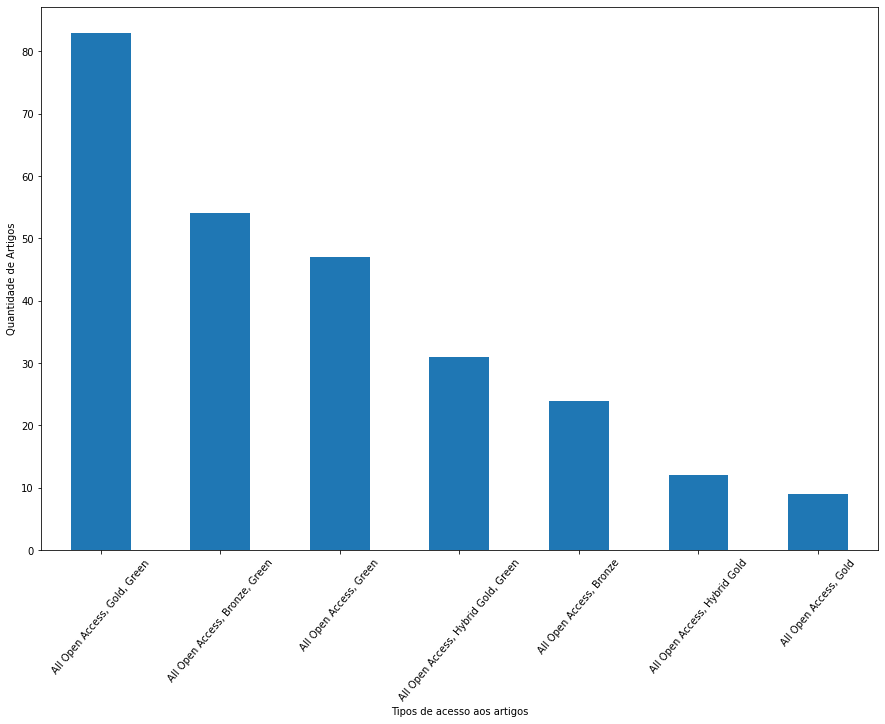

In [38]:
# pegar as 10 +
plt.figure(figsize=(15,10))
acesso_livre.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Tipos de acesso aos artigos")
plt.ylabel("Quantidade de Artigos")
plt.show()

In [41]:
# Analisando tipos de documentos
# Groupby by
tipo_documento = df_scopus.groupby("tipo_documento")

# Summary statistic of all
tipo_documento.describe()

ano                                                  \
                   count         mean       std     min      25%     50%   
tipo_documento                                                             
Article            328.0  2016.189024  4.865871  1992.0  2014.00  2017.5   
Book                 1.0  2014.000000       NaN  2014.0  2014.00  2014.0   
Book Chapter         8.0  2017.500000  2.878492  2013.0  2015.50  2018.5   
Conference Paper   161.0  2015.813665  3.564065  2005.0  2013.00  2016.0   
Conference Review    3.0  2015.333333  5.686241  2009.0  2013.00  2017.0   
Editorial            4.0  2018.000000  2.160247  2015.0  2017.25  2018.5   
Letter               3.0  2016.333333  3.785939  2012.0  2015.00  2018.0   
Note                 3.0  2018.666667  2.081666  2017.0  2017.50  2018.0   
Review              25.0  2017.480000  4.709211  2003.0  2016.00  2019.0   
Short Survey         1.0  2019.000000       NaN  2019.0  2019.00  2019.0   

                                   quantidade_paginas         ... fim_pagina_  \
                       75%     max              count   mean  ...         75%   
tipo_documento                                                ...               
Article            2020.00  2022.0                0.0    NaN  ...      775.25   
Book               2014.00  2014.0                0.0    NaN  ...      264.00   
Book Chapter       2019.25  2021.0                0.0    NaN  ...      792.25   
Conference Paper   2019.00  2022.0                1.0   11.0  ...      571.00   
Conference Review  2018.50  2020.0                2.0  971.0  ...      132.00   
Editorial          2019.25  2020.0                0.0    NaN  ...      414.25   
Letter             2018.50  2019.0                0.0    NaN  ...     1477.50   
Note               2019.50  2021.0                0.0    NaN  ...      807.50   
Review             2021.00  2022.0                0.0    NaN  ...      671.00   
Short Survey       2019.00  2019.0                0.0    NaN  ...       30.00   

                           quantidade_paginas_                                 \
                       max               count        mean         std    min   
tipo_documento                                                                  
Article            10381.0               216.0   82.675926  779.929255    1.0   
Book                 264.0                 1.0  263.000000         NaN  263.0   
Book Chapter        1111.0                 8.0   11.625000    8.331309    1.0   
Conference Paper    6096.0               141.0    6.390071    3.438798    1.0   
Conference Review    132.0                 1.0  131.000000         NaN  131.0   
Editorial            784.0                 4.0    2.000000    0.816497    1.0   
Letter              1582.0                 3.0    2.000000    0.000000    2.0   
Note                1048.0                 2.0    7.000000    8.485281    1.0   
Review              2607.0                17.0   10.294118    5.676318    4.0   
Short Survey          30.0                 1.0    1.000000         NaN    1.0   

                                                  
                      25%    50%     75%     max  
tipo_documento                                    
Article              6.00    8.0   10.00  9349.0  
Book               263.00  263.0  263.00   263.0  
Book Chapter         6.25   10.0   16.25    24.0  
Conference Paper     4.00    5.0    9.00    26.0  
Conference Review  131.00  131.0  131.00   131.0  
Editorial            1.75    2.0    2.25     3.0  
Letter               2.00    2.0    2.00     2.0  
Note                 4.00    7.0   10.00    13.0  
Review               6.00    9.0   13.00    26.0  
Short Survey         1.00    1.0    1.00     1.0  

[10 rows x 128 columns]

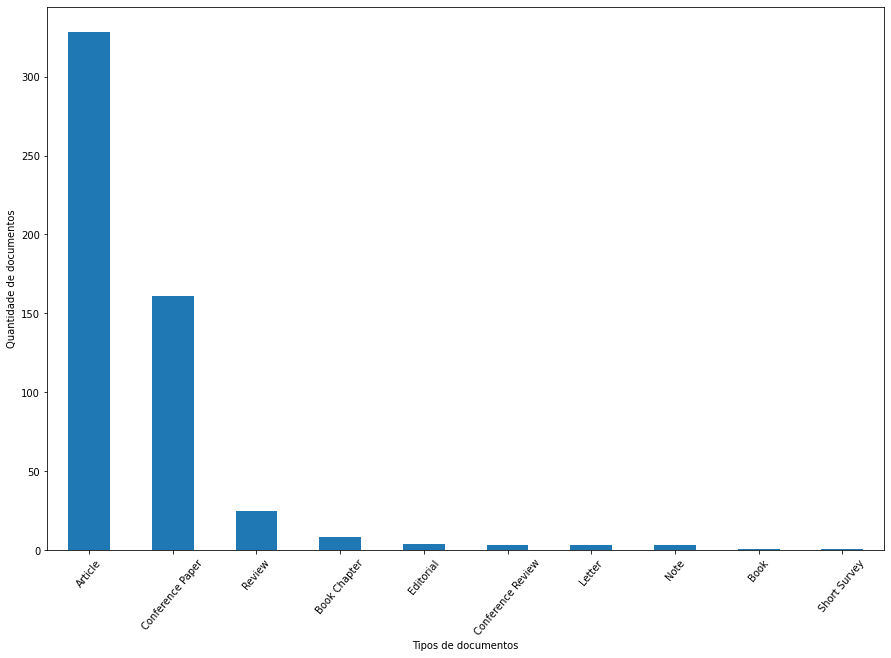

In [43]:
# pegar as 10 +
plt.figure(figsize=(15,10))
tipo_documento.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Tipos de documentos")
plt.ylabel("Quantidade de documentos")
plt.show()

### Analisando Locais de Conferencia

In [44]:
# Groupby by
local_conferencia = df_scopus.groupby("local_conferencia")

# Summary statistic of all
local_conferencia.describe()

ano                                                       \
                  count    mean  std     min     25%     50%     75%     max   
local_conferencia                                                              
Amsterdam           1.0  2007.0  NaN  2007.0  2007.0  2007.0  2007.0  2007.0   
Arlington, VA       1.0  2010.0  NaN  2010.0  2010.0  2010.0  2010.0  2010.0   
Boston, MA          1.0  2012.0  NaN  2012.0  2012.0  2012.0  2012.0  2012.0   
Brisbane, QLD       1.0  2007.0  NaN  2007.0  2007.0  2007.0  2007.0  2007.0   
Copenhagen          4.0  2013.0  0.0  2013.0  2013.0  2013.0  2013.0  2013.0   
Daejeon             1.0  2008.0  NaN  2008.0  2008.0  2008.0  2008.0  2008.0   
Dallas, TX          1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Gaithersburg, MD    1.0  2011.0  NaN  2011.0  2011.0  2011.0  2011.0  2011.0   
Geneva              1.0  2005.0  NaN  2005.0  2005.0  2005.0  2005.0  2005.0   
Hangzhou            1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Huelva              1.0  2011.0  NaN  2011.0  2011.0  2011.0  2011.0  2011.0   
Jeju                1.0  2012.0  NaN  2012.0  2012.0  2012.0  2012.0  2012.0   
Maastricht          1.0  2006.0  NaN  2006.0  2006.0  2006.0  2006.0  2006.0   
Maui, HI            1.0  2012.0  NaN  2012.0  2012.0  2012.0  2012.0  2012.0   
Niagara Falls, NY   1.0  2010.0  NaN  2010.0  2010.0  2010.0  2010.0  2010.0   
Niagara Falls, ON   1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Oslo                1.0  2011.0  NaN  2011.0  2011.0  2011.0  2011.0  2011.0   
Perth               1.0  2010.0  NaN  2010.0  2010.0  2010.0  2010.0  2010.0   
Philadelphia, PA    1.0  2012.0  NaN  2012.0  2012.0  2012.0  2012.0  2012.0   
Pisa                2.0  2012.0  0.0  2012.0  2012.0  2012.0  2012.0  2012.0   
Saarbrucken         1.0  2009.0  NaN  2009.0  2009.0  2009.0  2009.0  2009.0   
San Francisco, CA   1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Singapore           1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Turin               1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Verona              2.0  2009.0  0.0  2009.0  2009.0  2009.0  2009.0  2009.0   
Wshington, DC       1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   

                  quantidade_paginas         ... fim_pagina_         \
                               count   mean  ...         75%    max   
local_conferencia                            ...                      
Amsterdam                        0.0    NaN  ...      246.00  246.0   
Arlington, VA                    0.0    NaN  ...      496.00  496.0   
Boston, MA                       0.0    NaN  ...       77.00   77.0   
Brisbane, QLD                    0.0    NaN  ...      549.00  549.0   
Copenhagen                       0.0    NaN  ...      628.50  686.0   
Daejeon                          0.0    NaN  ...      353.00  353.0   
Dallas, TX                       0.0    NaN  ...      280.00  280.0   
Gaithersburg, MD                 1.0   11.0  ...         NaN    NaN   
Geneva                           0.0    NaN  ...      828.00  828.0   
Hangzhou                         0.0    NaN  ...      443.00  443.0   
Huelva                           0.0    NaN  ...       74.00   74.0   
Jeju                             0.0    NaN  ...       29.00   29.0   
Maastricht                       0.0    NaN  ...      844.00  844.0   
Maui, HI                         0.0    NaN  ...       32.00   32.0   
Niagara Falls, NY                0.0    NaN  ...      329.00  329.0   
Niagara Falls, ON                0.0    NaN  ...      947.00  947.0   
Oslo                             0.0    NaN  ...      798.00  798.0   
Perth                            0.0    NaN  ...      461.00  461.0   
Philadelphia, PA                 0.0    NaN  ...      950.00  950.0   
Pisa                             0.0    NaN  ...      221.25  239.0   
Saarbrucken                      0.0    NaN  ...      102.00  102.

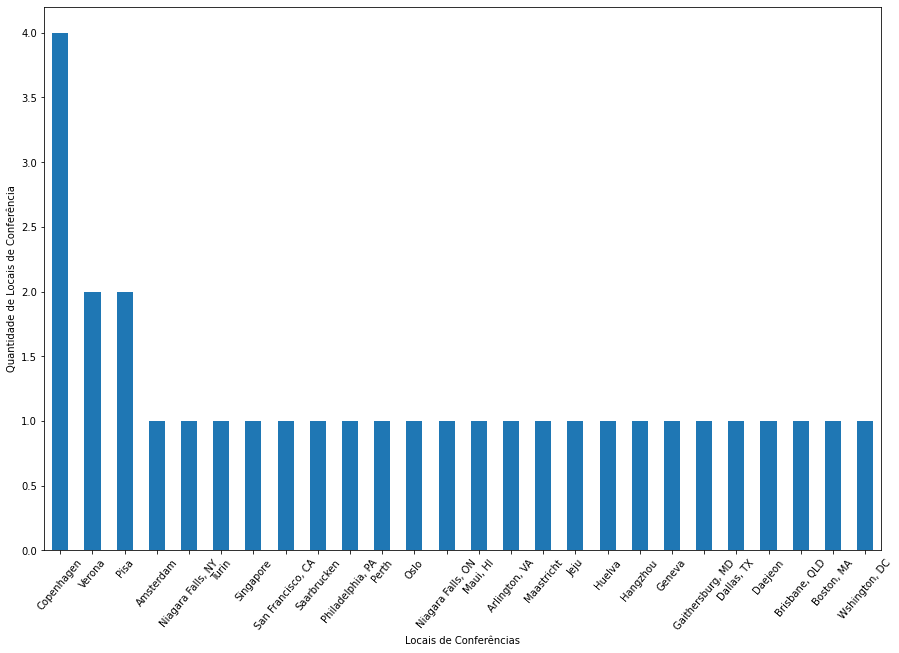

In [45]:
# pegar as 10 +
plt.figure(figsize=(15,10))
local_conferencia.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Locais de Conferências")
plt.ylabel("Quantidade de Locais de Conferência")
plt.show()

### Analisando Editores

In [46]:
# Groupby by
editor = df_scopus.groupby("editor")

# Summary statistic of all
editor.describe()

ano               \
                                                   count         mean   
editor                                                                  
Academic Press Inc.                                 42.0  2016.976190   
Adis                                                 5.0  2020.600000   
American Academy of Allergy, Asthma and Immunology   3.0  2019.333333   
American College of Physicians                       1.0  2017.000000   
American Society of Clinical Oncology                2.0  2020.000000   
...                                                  ...          ...   
Weston Medical Publishing                            1.0  2015.000000   
Wiley-Blackwell Publishing Ltd                       1.0  2018.000000   
World Scientific Publishing Co. Pte Ltd              3.0  2016.666667   
Wuhan University                                     1.0  2016.000000   
eLife Sciences Publications Ltd                      1.0  2017.000000   

                                                                              \
                                                         std     min     25%   
editor                                                                         
Academic Press Inc.                                 3.338527  2003.0  2015.0   
Adis                                                1.140175  2019.0  2020.0   
American Academy of Allergy, Asthma and Immunology  2.081666  2017.0  2018.5   
American College of Physicians                           NaN  2017.0  2017.0   
American Society of Clinical Oncology               0.000000  2020.0  2020.0   
...                                                      ...     ...     ...   
Weston Medical Publishing                                NaN  2015.0  2015.0   
Wiley-Blackwell Publishing Ltd                           NaN  2018.0  2018.0   
World Scientific Publishing Co. Pte Ltd             1.154701  2016.0  2016.0   
Wuhan University                                         NaN  2016.0  2016.0   
eLife Sciences Publications Ltd                          NaN  2017.0  2017.0   

                                                                            \
                                                       50%     75%     max   
editor                                                                       
Academic Press Inc.                                 2017.0  2019.0  2022.0   
Adis                                                2021.0  2021.0  2022.0   
American Academy of Allergy, Asthma and Immunology  2020.0  2020.5  2021.0   
American College of Physicians                      2017.0  2017.0  2017.0   
American Society of Clinical Oncology               2020.0  2020.0  2020.0   
...                                                    ...     ...     ...   
Weston Medical Publishing                           2015.0  2015.0  2015.0   
Wiley-Blackwell Publishing Ltd                      2018.0  2018.0  2018.0   
World Scientific Publishing Co. Pte Ltd             2016.0  2017.0  2018.0   
Wuhan University                                    2016.0  2016.0  2016.0   
eLife Sciences Publications Ltd                     2017.0  2017.0  2017.0   

                                                   quantidade_paginas       \
                                                                count mean   
editor                                                                       
Academic Press Inc.                                               0.0  NaN   
Adis                                                              0.0  NaN   
American Academy of Allergy, Asthma and Immunology                0.0  NaN   
American College of Physicians                                    0.0  NaN   
American Society of Clinical Oncology                             0.0  NaN   
...                                                               ...  ...   
Weston Medical Publishing                                         0.0  NaN   
Wiley-Blackwell Publishing Ltd      

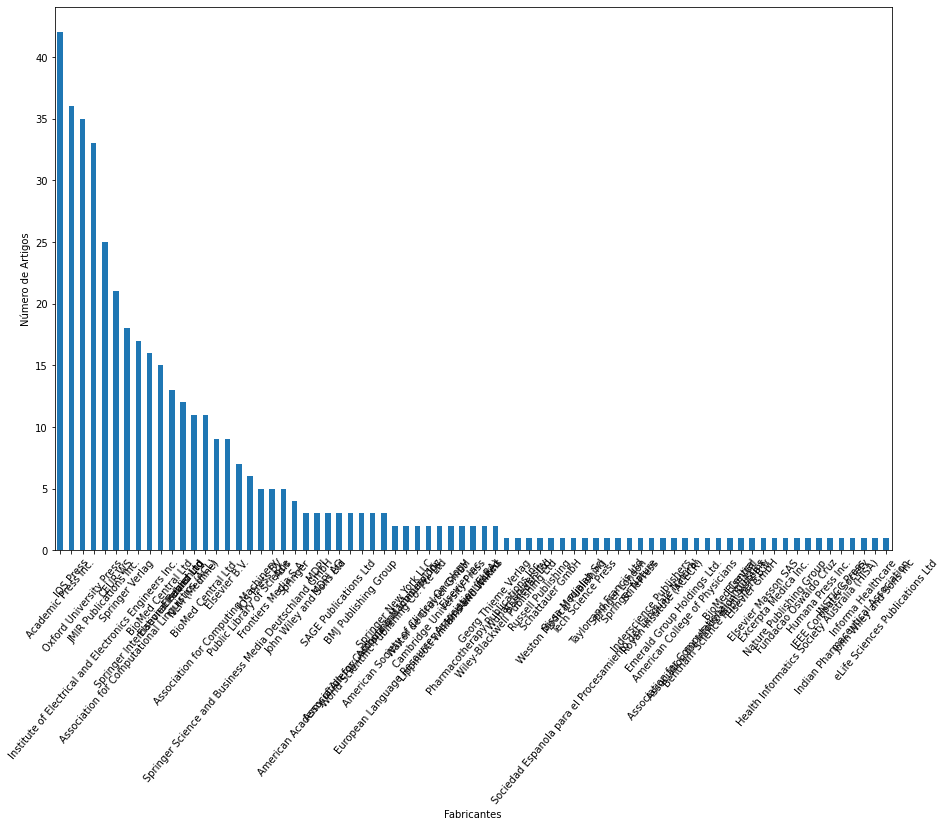

In [47]:
plt.figure(figsize=(15,10))
editor.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Fabricantes")
plt.ylabel("Número de Artigos")
plt.show()

### Analisando artigos por Ano

In [48]:
# Groupby by
ano = df_scopus.groupby("ano")

# Summary statistic of all
ano.describe()

quantidade_paginas                                                      \
                  count    mean std     min     25%     50%     75%     max   
ano                                                                           
1992                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2000                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2001                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2003                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2004                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2005                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2006                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2007                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2008                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2009                1.0   448.0 NaN   448.0   448.0   448.0   448.0   448.0   
2010                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2011                1.0    11.0 NaN    11.0    11.0    11.0    11.0    11.0   
2012                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2013                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2014                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2015                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2016                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2017                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2018                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2019                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2020                1.0  1494.0 NaN  1494.0  1494.0  1494.0  1494.0  1494.0   
2021                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2022                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   

     quantidade_citacoes               ... fim_pagina_           \
                   count         mean  ...         75%      max   
ano                                    ...                        
1992                 1.0    30.000000  ...      896.00    896.0   
2000                 1.0    22.000000  ...      153.00    153.0   
2001                 1.0  1339.000000  ...       21.00     21.0   
2003                 3.0   138.000000  ...      437.00    533.0   
2004                 4.0    13.500000  ...      578.00    767.0   
2005                 5.0    14.800000  ...     1137.50   2066.0   
2006                 6.0    38.666667  ...      678.00    844.0   
2007                 4.0     9.750000  ...      397.50    549.0   
2008                10.0    24.700000  ...      620.50    691.0   
2009                 7.0    47.428571  ...      379.75   2083.0   
2010                16.0    23.750000  ...      608.50    913.0   
2011                15.0    35.133333  ...      758.00   1279.0   
2012                17.0    31.117647  ...     1003.00   1582.0   
2013                25.0    23.200000  ...      728.50    961.0   
2014                32.0    29.906250  ...      657.75   1069.0   
2015                40.0    38.125000  ...      431.75   1788.0   
2016                28.0    38.107143  ...      534.50   2028.0   
2017                49.0    22.734694  ...      688.00   7433.0   
2018                50.0    15.320000  ...      733.50   4809.0   
2019                53.0    11.981132  ...      839.00   6096.0   
2020                48.0     8.104167  ...      697.25  10381.0   
2021                34.0     2.411765  ...      908.50   3020.0   
2022                 3.0     1.333333  ...     1170.00   2123.0   

     quantidade_paginas_                                                     \
                   count        mean          std   min    25%   50%    75%   
ano                                              

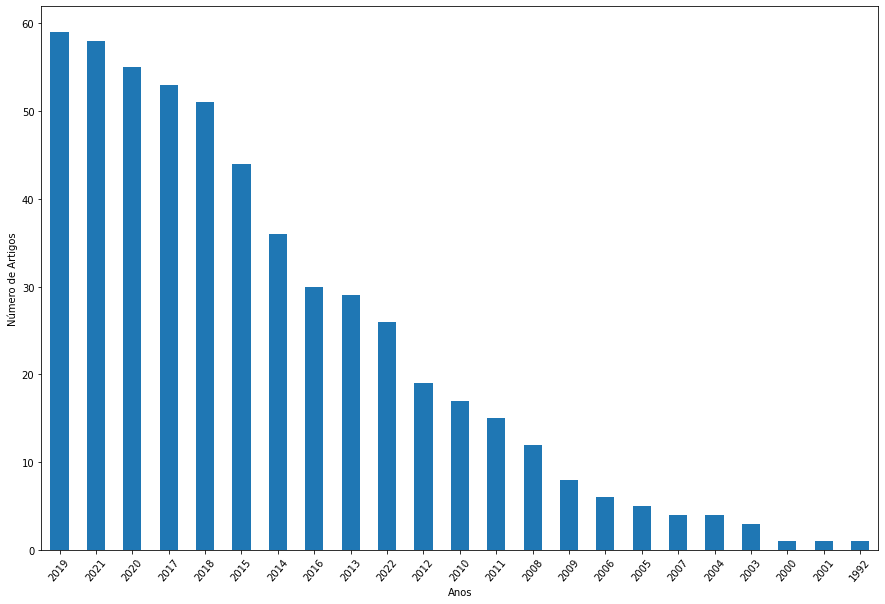

In [51]:
plt.figure(figsize=(15,10))
ano.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Anos")
plt.ylabel("Número de Artigos")
plt.show()

### Analisando os idiomas

In [52]:
# Groupby by
idioma = df_scopus.groupby("idioma_original")

# Summary statistic of all
idioma.describe().head()

ano                                                         \
                 count         mean       std     min     25%     50%     75%   
idioma_original                                                                 
English          535.0  2016.186916  4.450163  1992.0  2014.0  2017.0  2020.0   
French             1.0  2011.000000       NaN  2011.0  2011.0  2011.0  2011.0   
Spanish            1.0  2018.000000       NaN  2018.0  2018.0  2018.0  2018.0   

                        quantidade_paginas         ... fim_pagina_           \
                    max              count   mean  ...         75%      max   
idioma_original                                    ...                        
English          2022.0                3.0  651.0  ...      688.75  10381.0   
French           2011.0                0.0    NaN  ...      161.00    161.0   
Spanish          2018.0                0.0    NaN  ...       36.00     36.0   

                quantidade_paginas_                                        \
                              count       mean         std  min  25%  50%   
idioma_original                                                             
English                       392.0  49.596939  579.690874  1.0  4.0  7.0   
French                          1.0   3.000000         NaN  3.0  3.0  3.0   
Spanish                         1.0   5.000000         NaN  5.0  5.0  5.0   

                               
                  75%     max  
idioma_original                
English          9.25  9349.0  
French           3.00     3.0  
Spanish          5.00     5.0  

[3 rows x 128 columns]

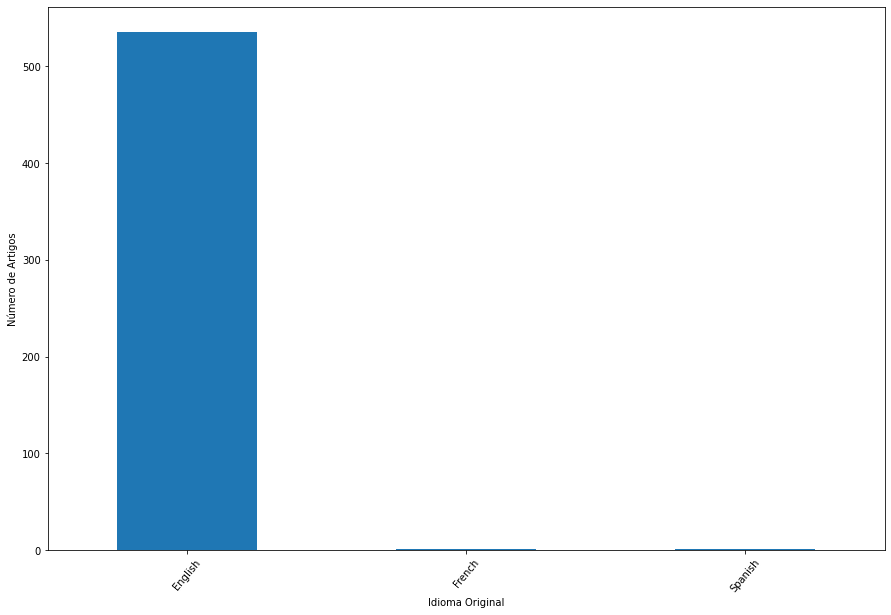

In [53]:
plt.figure(figsize=(15,10))
idioma.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Idioma Original")
plt.ylabel("Número de Artigos")
plt.show()

In [ ]:
# Gráfico demora
print('Visão geral em gráfico')
sns.pairplot(df_scopus)

 ### Nuvem de Palavras

#### Nuvem de Palavras dos Títulos

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

In [ ]:
print('Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.')
#df_scopus['issn_scopus'] = df_scopus.issn_scopus.str.upper()
palavras_titulo = df_scopus['titulo_artigo'].str.lower()
palavras_titulo

In [ ]:
print(f'Criando Nuvem de Palavras sem tratamento para ter ideia do corpus.')
# Variável recebe conteúdo do dataframe palavras concatenando cada conteúdo do texto separando por espaço
wordcloud_palavras_titulo = " ".join(s for s in palavras_titulo)
#wordcloud_palavras

In [ ]:
print(f'Quantidade de palavras no corpus: {len(wordcloud_palavras_titulo)} e seu tipo atual é{type(wordcloud_palavras_titulo)}')

In [ ]:
print(f'Criação da nuvem de palavras sem tratamento nos textos')
wordcloud_titulo = WordCloud(stopwords=stopwords,
                      background_color='black', width=1600,                            
                      height=800).generate(wordcloud_palavras_titulo)

In [ ]:
#Gráfico Nuvem de Palavras
# Gerando o grafico 
# Variáveis do gráfico 
path_image = '../image/'

titulo = 'Nuvem de Palavras'
#eixo_x = ''
#eixo_y = ''
image = path_image+'wordcloud_titulo'
extensao_arquivo = '.pdf'

#Gráfico
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud_titulo, interpolation='bilinear')
ax.set_axis_off()         

#legendas
#ax.legend(title='Legenda', loc=4, fontsize=9)
ax.set_title(titulo, fontsize=18)
#ax.set_xlabel(eixo_x, fontsize=9)
#ax.set_ylabel(eixo_y, fontsize=9)

#salvar imagens
plt.savefig(image+extensao_arquivo) #, format='pdf', dpi=300, transparent=True)
plt.tight_layout() 
plt.show()

#### Nuvem de Palavras dos Resumos

In [ ]:
print('Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.')
palavras_resumo = df_scopus['resumo'].str.lower()
palavras_resumo

In [ ]:
print(f'Criando Nuvem de Palavras sem tratamento para ter ideia do corpus.')
# Variável recebe conteúdo do dataframe palavras concatenando cada conteúdo do texto separando por espaço
wordcloud_palavras_resumo = " ".join(s for s in palavras_resumo)
#wordcloud_palavras

In [ ]:
print(f'Quantidade de palavras no corpus: {len(wordcloud_palavras_resumo)} e seu tipo atual é{type(wordcloud_palavras_resumo)}')

In [ ]:
print(f'Criação da nuvem de palavras sem tratamento nos textos')
wordcloud_resumo = WordCloud(stopwords=stopwords,
                      background_color='black', width=1600,                            
                      height=800).generate(wordcloud_palavras_resumo)

In [ ]:
#Gráfico Nuvem de Palavras
path_image = '../image/'

titulo = 'Nuvem de Palavras'
#eixo_x = ''
#eixo_y = ''
image = path_image+'wordcloud_resumo'
extensao_arquivo = '.pdf'

#Gráfico
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud_resumo, interpolation='bilinear')
ax.set_axis_off()         

#legendas
#ax.legend(title='Legenda', loc=4, fontsize=9)
ax.set_title(titulo, fontsize=18)
#ax.set_xlabel(eixo_x, fontsize=9)
#ax.set_ylabel(eixo_y, fontsize=9)

#salvar imagens
plt.savefig(image+extensao_arquivo) #, format='pdf', dpi=300, transparent=True)
plt.tight_layout() 
plt.show()

## Exportação do resultado para Excel

In [ ]:
df_scopus.columns

In [ ]:
## Gerar planilha com colunas especificas
#resultado_scopus = os.path.join('../data','scopus-08-06-2022.csv')
resultado_scopus = os.path.join('../data','resultado_scopus-22-06-2022.xlsx')
sheetname="base_scopus"

df_xlsx_scopus = pd.DataFrame(df_scopus, columns = [
       'issn_scopus','titulo_artigo', 'ano','quantidade_citacoes', 'tipo_documento', 'nome_conferencia',
       'editores', 'patrocinadores', 'editor',
       'autores', 'id_autores', 'titulo_fonte',
       'volume', 'publicado', 'numero_artigo',
       'inicio_pagina', 'fim_pagina','quantidade_paginas','inicio_pagina_','fim_pagina_','quantidade_paginas_',
       'doi', 'link_scopus',
       'afiliacoes', 'autores_com_filiacoes', 'resumo',
       'palavras_chaves_autor', 'palavras_chave_index',
       'numeros_sequencia_molecular', 'chemicals_cas', 'nomes_comerciais',
       'fabricantes',
       'detalhes_financiamento', 'texto_financiamento_1','texto_financiamento_2', 'texto_financiamento_3',
       'texto_financiamento_4','texto_financiamento_5', 'texto_financiamento_6', 'texto_financiamento_7',
       'texto_financiamento_8','texto_financiamento_9', 'texto_financiamento_10',
       'referencias', 'endereco_correspondencia', 
       'data_conferencia', 'local_conferencia',
       'codigo_conferencia', 'isbn', 'coden', 'id_pubmed',
       'idioma_original', 'titulo_abreviado_fonte', 
       'etapa_publicacao', 'acesso_livre', 'fonte', 'eid'
    ,])
df_xlsx_scopus = df_xlsx_scopus.to_excel(resultado_scopus, sheet_name=sheetname, index=False, encoding='utf-8', header=True)

# Carga - Base PubMed

In [ ]:
print('Carga e Visualização do dataframe')
arquivo_base_pubmed = os.path.join('../data','pubmed-csv-naturallan-set-2022.csv')
raw_data_pubmed = pd.read_csv(arquivo_base_pubmed, sep=",", delimiter=None, encoding='utf-8')
raw_data_pubmed.head(3)

## Analisando base PUBMED

In [ ]:
print('Verificando tipos e se tem dados nulos')
raw_data_pubmed.info()

In [ ]:
raw_data_pubmed.nunique()

In [ ]:
# verificar campos nulos
raw_data_pubmed.isnull().sum()

In [ ]:
## Verificar se os dataframes nao s"ao espelhos
df_pubmed = raw_data_pubmed.copy()
print(id(df_pubmed), id(raw_data_pubmed))

## Ajustar de Colunas

### Alterar nome de Colunas

In [ ]:
print('Verificar colunas')
df_pubmed.columns

In [ ]:
columns_pubmed = {
    'PMID':'id_pubmed',
    'Title':'titulo_artigo',
    'Authors':'autores_pubmed',
    'Citation':'citacao_pubmed',
    'First Author':'primeiro_autor_pubmed',
    'Journal/Book':'jornal_book_pubmed',
    'Publication Year':'ano_publicacao_pubmed',
    'Create Date':'data_criacao_pubmed', 
    'PMCID':'id_pmc_pubmed', 
    'NIHMS ID':'id_nihms_pubmed', 
    'DOI':'doi_pubmed',
}

In [ ]:
df_pubmed = df_pubmed.rename(columns=columns_pubmed)
df_pubmed.head(2)

### Inclusão de novas colunas

In [ ]:
## criar uma coluna fonte com valor = pubmed
df_pubmed['fonte']='PubMed' # variavel para receber a base indexada do documento

In [ ]:
# manter uma coluna padraa, a princiío estes  nao se repetem e podem ser critério de eliminacao de duplicata junto com título
df_pubmed["doi"] = df_pubmed["doi_pubmed"]

In [ ]:
# manter uma coluna padraa, a princiío estes  nao se repetem e podem ser critério de eliminacao de duplicata 
df_pubmed["titulo_artigo_pubmed"] = df_pubmed["titulo_artigo"]

## Colunas para lower

In [ ]:
df_pubmed["titulo_artigo"] = df_pubmed["titulo_artigo"].str.lower()
df_pubmed["doi"] = df_pubmed["doi"].str.lower()

## Remover caracteres especiais

In [ ]:
df_pubmed["titulo_artigo"] = df_pubmed["titulo_artigo"].apply(lambda x: re.sub('\?|\*|;|,|\.|-|–|:|“|”|"|—|•', ' ', x))

In [ ]:
df_pubmed.loc[:,'titulo_artigo'] = df_pubmed['titulo_artigo'].apply(limpar_campo)

In [ ]:
df_pubmed['titulo_artigo'] = df_pubmed['titulo_artigo'].str.replace('  ', ' ')

## Colunas Strip

In [ ]:
df_pubmed["titulo_artigo"] = df_pubmed["titulo_artigo"].str.strip()

## Ajustar tipagem de dados

In [ ]:
print('Ajustar tipagem dos dados')
df_pubmed['jornal_book_pubmed'] = df_pubmed['jornal_book_pubmed'].astype('category')

In [ ]:
df_pubmed.info()

## Verificar duplicados

In [ ]:
# Ordenando para excluir primeiro as duplicidades
df_pubmed = df_pubmed.sort_values(['doi_pubmed','titulo_artigo'])
df_pubmed[['doi_pubmed','titulo_artigo']]

In [ ]:
df_pubmed = df_pubmed.drop_duplicates(['titulo_artigo','doi_pubmed'], keep='last') ## de 188 para [187 rows x 14 columns]
print(df_pubmed)

 ## Analisar dados tratados

In [ ]:
print('Verificando tipos e se tem dados nulos')
df_pubmed.info()

In [ ]:
### analisar estes números máximos e mínimos ?????????
print('Resumo Estatístico de Campos Numéricos')
df_pubmed.describe()

In [ ]:
df_pubmed.nunique()

## Planilha PubMed

In [ ]:
df_pubmed.columns

In [ ]:
## Gerar planilha com colunas especificas
#resultado_geral = os.path.join('../data','scopus-31-05-2021.csv')
resultado_pubmed = os.path.join('../data','resultado_pubmed-13-06-22.xlsx')
sheetname="base_pubmed"

df_xlsx_pubmed = pd.DataFrame(df_pubmed, columns = [
    'id_pubmed', 'titulo_artigo','titulo_artigo_pubmed','ano_publicacao_pubmed','fonte','autores_pubmed', 'citacao_pubmed',
    'primeiro_autor_pubmed', 'jornal_book_pubmed','data_criacao_pubmed',
    'id_pmc_pubmed', 'id_nihms_pubmed', 'doi','doi_pubmed'
    ,])
df_xlsx_pubmed = df_xlsx_pubmed.to_excel(resultado_pubmed,sheet_name=sheetname,index=False, encoding='utf-8', header=True)

# Concatenar dataframes de bases indexadas

In [ ]:
#https://www.acervolima.com.br/2020/08/concat-e-append-do-pandas-como-usar.html
qtde_scopus = df_scopus.titulo_artigo.count()
qtde_pubmed = df_pubmed.titulo_artigo.count()

# 3 colunas em comum: titulo_artigo, id_pubmed, fonte
shape_scopus = df_scopus.shape
shape_pubmed = df_pubmed.shape

print(f'A quantidade de artigos na base scopus é: {qtde_scopus} e a quantidade de colunas é {shape_scopus}')
print(f'A quantidade de artigos na base pubmed é: {qtde_pubmed} e a quantidade de colunas é {shape_pubmed}')
print(f'O total de artigos concatedos tem que ser {qtde_pubmed+qtde_scopus}')

In [ ]:
frames = [df_scopus, df_pubmed]

In [ ]:
df_bases = pd.concat(frames)

In [ ]:
# Ordenando para excluir primeiro as duplicidades pubmed
df_bases = df_bases.sort_values(['fonte','autores_pubmed'])
df_bases

In [ ]:
df_bases.columns

## Remover caracteres especiais

In [ ]:
df_bases.query('doi_pubmed == "10.1007/978-3-319-48472-3_43" ')[['titulo_artigo','id_pubmed','issn_scopus','doi_scopus','doi_pubmed']]

In [ ]:
df_bases.query('doi_scopus == "10.1007/978-3-319-48472-3_43" ')[['titulo_artigo','id_pubmed','issn_scopus','doi_scopus','doi_pubmed']]

### Aplicando caracteres especiais

In [ ]:
#remove números e caracteres especiais
#df_bases["titulo_artigo"] = df_bases["titulo_artigo"].apply(lambda x: re.sub('\?|\*|;|,|\.|-|–|:|“|”|"|—|•', ' ', x))

df_bases["titulo_artigo"] = df_bases["titulo_artigo"].apply(lambda x: re.sub('\?|\*|;|,|\.|-|–|:|"|•', ' ', x))

In [ ]:
df_bases.loc[:,'titulo_artigo'] = df_bases['titulo_artigo'].apply(limpar_campo)

In [ ]:
df_bases['titulo_artigo'] = df_bases['titulo_artigo'].str.replace('  ', ' ')

In [ ]:
df_bases["titulo_artigo"] = df_bases["titulo_artigo"].str.strip()

In [ ]:
df_bases.query('doi_pubmed == "10.1007/978-3-319-48472-3_43" ')[['titulo_artigo','id_pubmed','issn_scopus','doi_scopus','doi_pubmed']]

## Excluir duplicatas

In [ ]:
df_bases = df_bases.drop_duplicates(['titulo_artigo', 'doi'], keep='last') ## de 724 para [561 rows x 69 columns]
print(df_bases)

In [ ]:
df_bases = df_bases.drop_duplicates(['titulo_artigo', 'id_pubmed'], keep='last') #### de 561 para [554 rows x 554 columns]
print(df_bases)

## Filtrar base indexada final

In [ ]:
# ver os tipos de documentos
df_bases.groupby(by=["tipo_documento"]).sum()

In [ ]:
# retirar documentos: Conference Review, Editorial, letter e Note
# gerar plan geral e testar se os filtros funcionam só no scopus para maior assertividade

lista_tipo_doc = ["Conference Review","Editorial","Letter","Note"]

df_bases_filtrado = df_bases.query('tipo_documento != @lista_tipo_doc ') ## de 531 para = 519 rows × 62 columns
df_bases_filtrado

In [ ]:
# retirar documentos com menos de 3 páginas e deixar os campos vazios tbm

#numumero_paginas = 3

#df.query('year > 2012 | name == "Frank"')
#df_bases_filtrado = df_bases.query('quantidade_paginas_ > @numumero_paginas ')
#df_bases_filtrado = df_bases.query('quantidade_paginas_ == None ')


df_bases_filtrado = df_bases_filtrado[df_bases_filtrado['quantidade_paginas_'].isnull() | (df_bases_filtrado['quantidade_paginas_'] > 3) ]
df_bases_filtrado 

In [ ]:
# Ordenando 
df_bases_filtrado = df_bases_filtrado.sort_values(['titulo_artigo','id_pubmed'])
df_bases_filtrado

## Ajustes de bases indexadas final

In [ ]:
# Criar colunas
df_bases_filtrado['documentos_6+']=0 # variavel que marca os artigos + tops para ler
df_bases_filtrado['documentos_94+']=0 # variavel que marca os artigos + tops para ler
df_bases_filtrado['pdf_baixado']=0 #

df_bases_filtrado['leitura_resumo']=0 # 0 nao foi lido e 1 foi lido 
df_bases_filtrado['leitura_conclusao']=0 # 0 nao foi lido e 1 foi lido
df_bases_filtrado['leitura_completa']=0 # 0 nao foi lido e 1 foi lido
df_bases_filtrado['resumo_traduzido']=None
df_bases_filtrado['conclusao_traduzida']=None

# colunas para marcar estudo posterior para conceitos
df_bases_filtrado['conceituar_metamap']=0 # variavel que marca artigo para rever conceito
df_bases_filtrado['conceituar_farmacovigilancia']=0 # variavel que marca artigo para rever conceito
df_bases_filtrado['conceituar_Reacao_adversa_medicamentos_RAM']=0 # variavel que marca artigo para rever conceito
df_bases_filtrado['conceituar_reconhecimento_entidades_nomeadas_REN']=0 # variavel que marca artigo para rever conceito
df_bases_filtrado['conceituar_UMLS']=0
df_bases_filtrado['conceituar_metamap_data_file_builder_DFB']=0
df_bases_filtrado['conceituar_ferramenta_lexicos_LVG']=0
df_bases_filtrado['conceituar_MetamorphoSys']=0
df_bases_filtrado['conceituar_NLP']=0
df_bases_filtrado['conceituar_outros']=None
df_bases_filtrado['observacao']=None
df_bases_filtrado['sincronizado_mendeley']=0
df_bases_filtrado['data_leitura_resumo']=None
df_bases_filtrado['data_leitura_completa']=None
df_bases_filtrado['palavras_chaves_titulo']=None # variavel para receber as palavras + importantes em um artigo
df_bases_filtrado['palavras_chaves_resumo']=None # variavel para receber as palavras + importantes em um artigo

In [ ]:
# Colocar estes campos no dataframe final filtrado

df_bases_filtrado.loc[
    (df_bases_filtrado['titulo_artigo'].str.contains('twitter'))|
    (df_bases_filtrado['titulo_artigo'].str.contains('metamap'))|
    (df_bases_filtrado['titulo_artigo'].str.contains('NLP'))|
    (df_bases_filtrado['titulo_artigo'].str.contains('social media'))|
    (df_bases_filtrado['titulo_artigo'].str.contains('social network'))|
    (df_bases_filtrado['titulo_artigo'].str.contains('natural language processing')),'palavras_chaves_titulo'] = "twitter|metamap|nlp"

df_bases_filtrado.query('palavras_chaves_titulo=="twitter|metamap|nlp"')['titulo_artigo'].count()

In [ ]:
df_bases_filtrado.loc[
    (df_bases_filtrado['resumo'].str.contains('twitter'))|
    (df_bases_filtrado['resumo'].str.contains('metamap'))|
    (df_bases_filtrado['resumo'].str.contains('NLP'))|
    (df_bases_filtrado['resumo'].str.contains('social media'))|
    (df_bases_filtrado['resumo'].str.contains('social network'))|
    (df_bases_filtrado['resumo'].str.contains('natural language processing')),'palavras_chaves_resumo'] = "twitter|metamap|nlp"


df_bases_filtrado.query('palavras_chaves_resumo=="twitter|metamap|nlp"')['resumo'].count()

## Excluir alguns registros

In [ ]:
df_bases.query('id_pubmed== 28664200')[['titulo_artigo','id_pubmed','issn_scopus','doi_scopus','doi_pubmed']]

In [ ]:
df_bases_filtrado.query('id_pubmed== 28664200')

In [ ]:
df_bases_filtrado.query('titulo_artigo== "extraction of adverse drug effects from clinical records"')

In [ ]:
df_bases.query('titulo_artigo== "extraction of adverse drug effects from clinical records"')[['titulo_artigo','id_pubmed','issn_scopus','doi_scopus','doi_pubmed']]

In [ ]:
## estranho q parece q está excluindo 2 registros
df_remove = df_bases_filtrado.loc[
    (df_bases_filtrado['id_pubmed'] == 28664200) & (df_bases_filtrado['doi_pubmed'] == '10.1007/978-3-319-48472-3_43') |
    (df_bases_filtrado['doi_scopus'] == '10.3233/978-1-60750-588-4-739') & (df_bases_filtrado['titulo_artigo'] == 'extraction of adverse drug effects from clinical records')
]

df_bases_filtrado = df_bases_filtrado.drop(df_remove.index)
df_bases_filtrado

## Traduzir conteúdo de colunas

<b>Ajustes a serem realizados com a biblioteca de tradução</b>
1. pip install google_trans_new
1. ir no local da instalação e ajustar o arquivo (..\Python\Lib\site-packages\google_trans_new) "google_trans_new.py"
1. alterar linha 151, **de**:  response = (decoded_line + ']') **para**: response = (decoded_line + '')
1. reiniciar o kernel do Python/Jupyter

<br>

**Referências**
<br>
https://thewebdev.info/2022/04/17/how-to-fix-googletrans-stopped-working-with-error-nonetype-object-has-no-attribute-group-with-python/ <br>
https://github.com/lushan88a/google_trans_new/issues/46 <br>
https://www.linkedin.com/pulse/traduzindo-dados-pandasdataframe-com-google-translate-romerito-morais/?originalSubdomain=pt (testar este)

In [ ]:
translator = google_translator()

In [ ]:
df_bases_filtrado['titulo_artigo_traduzido']=df_bases_filtrado['titulo_artigo'].apply(lambda x: translator.translate(x,lang_tgt='pt'))

In [ ]:
%%time
df_bases_filtrado['titulo_artigo_pubmed_traduzido']=df_bases_filtrado['titulo_artigo_pubmed'].apply(lambda x: translator.translate(x,lang_tgt='pt'))

In [ ]:
%%time
df_bases_filtrado['resumo_traduzido_google_translator']=df_bases_filtrado['resumo'].apply(lambda x: translator.translate(x,lang_tgt='pt'))

In [ ]:
df_bases_filtrado[['leitura_conclusao']]

## Planilha Bases indexadas filtradas¶

In [ ]:
df_bases_filtrado.columns

In [ ]:
## Gerar planilha com colunas especificas
#resultado_geral = os.path.join('../data','scopus-31-05-2021.csv')
resultado_dfs = os.path.join('../data','bases_filtradas-resumida-14-06-2022.xlsx')
sheetname="bases_filtradas"

df_xlsx_dfs = pd.DataFrame(df_bases_filtrado, columns = [   
    'eid', 'doi', 'titulo_artigo', 'titulo_artigo_traduzido',#'titulo_artigo_scopus','titulo_artigo_scopus_traduzido',
    'ano',
    'palavras_chaves_titulo','quantidade_citacoes',
    'resumo', 'resumo_traduzido_google_translator', 'palavras_chaves_resumo', 'conclusao_traduzida', 
     'quantidade_paginas_','link_scopus', 'editor',
    
    # Conferencia
    'nome_conferencia', 'data_conferencia', 'local_conferencia', 'codigo_conferencia',
    
     'idioma_original', 'tipo_documento', 'acesso_livre', 'fonte', 

       'ano_publicacao_pubmed', 'data_criacao_pubmed',
       'doi_pubmed',
       
    # Campos criados para preenchimento
    'documentos_6+', 'documentos_94+', 'pdf_baixado', 'leitura_resumo','leitura_completa', 
       'conceituar_metamap', 'conceituar_farmacovigilancia', 'conceituar_Reacao_adversa_medicamentos_RAM',
       'conceituar_reconhecimento_entidades_nomeadas_REN', 'conceituar_UMLS',
       'conceituar_metamap_data_file_builder_DFB', 'conceituar_ferramenta_lexicos_LVG', 'conceituar_MetamorphoSys',
       'conceituar_NLP', 'conceituar_outros', 'observacao', 'leitura_conclusao',
       'sincronizado_mendeley', 'data_leitura_resumo', 'data_leitura_completa',   
    ])
df_xlsx_dfs = df_xlsx_dfs.to_excel(resultado_dfs,sheet_name=sheetname,index=False, encoding='utf-8', header=True)

In [ ]:
## Gerar planilha com colunas especificas
#resultado_geral = os.path.join('../data','scopus-31-05-2021.csv')
resultado_dfs = os.path.join('../data','bases_filtradas-completa-14-06-2022.xlsx')
sheetname="bases_completa"

df_xlsx_dfs = pd.DataFrame(df_bases_filtrado, columns = [   
'autores_scopus', 'id_autores', 'titulo_artigo', 'ano', 'titulo_fonte',
       'volume', 'publicado', 'numero_artigo', 'inicio_pagina', 'fim_pagina',
       'quantidade_paginas', 'quantidade_citacoes', 'doi_scopus',
       'link_scopus', 'afiliacoes', 'autores_com_filiacoes', 'resumo',
       'palavras_chaves_autor', 'palavras_chave_index',
       'numeros_sequencia_molecular', 'chemicals_cas', 'nomes_comerciais',
       'fabricantes', 'detalhes_financiamento', 'texto_financiamento_1',
       'texto_financiamento_2', 'texto_financiamento_3',
       'texto_financiamento_4', 'texto_financiamento_5',
       'texto_financiamento_6', 'texto_financiamento_7',
       'texto_financiamento_8', 'texto_financiamento_9',
       'texto_financiamento_10', 'referencias', 'endereco_correspondencia',
       'editores', 'patrocinadores', 'editor', 'nome_conferencia',
       'data_conferencia', 'local_conferencia', 'codigo_conferencia',
       'issn_scopus', 'isbn', 'coden', 'id_pubmed', 'idioma_original',
       'titulo_abreviado_fonte', 'tipo_documento', 'etapa_publicacao',
       'acesso_livre', 'fonte', 'eid', 'doi', 'titulo_artigo_scopus',
       'inicio_pagina_', 'fim_pagina_', 'quantidade_paginas_',
       'autores_pubmed', 'citacao_pubmed', 'primeiro_autor_pubmed',
       'jornal_book_pubmed', 'ano_publicacao_pubmed', 'data_criacao_pubmed',
       'id_pmc_pubmed', 'id_nihms_pubmed', 'doi_pubmed',
       'titulo_artigo_pubmed', 'documentos_6+', 'documentos_94+',
       'pdf_baixado', 'leitura_resumo', 'leitura_conclusao',
       'leitura_completa', 'resumo_traduzido', 'conclusao_traduzida',
       'conceituar_metamap', 'conceituar_farmacovigilancia',
       'conceituar_Reacao_adversa_medicamentos_RAM',
       'conceituar_reconhecimento_entidades_nomeadas_REN', 'conceituar_UMLS',
       'conceituar_metamap_data_file_builder_DFB',
       'conceituar_ferramenta_lexicos_LVG', 'conceituar_MetamorphoSys',
       'conceituar_NLP', 'conceituar_outros', 'observacao',
       'sincronizado_mendeley', 'data_leitura_resumo', 'data_leitura_completa',
       'palavras_chaves_titulo', 'palavras_chaves_resumo',
       'titulo_artigo_scopus_traduzido', 'titulo_artigo_pubmed_traduzido',
       'resumo_traduzido_google_translator' 
    ])
df_xlsx_dfs = df_xlsx_dfs.to_excel(resultado_dfs,sheet_name=sheetname,index=False, encoding='utf-8', header=True)

# Curiosidades

**dois artigos?**
<br>

Erratum to: Digital drug safety surveillance: Monitoring pharmaceutical products in Twitter (Drug Safety DOI: 10.1007/s40264-014-0155-x)

<br>

Digital drug safety surveillance: Monitoring pharmaceutical products in Twitter

In [ ]:
data_fim = pd.Timestamp.now()
print(f'Programa iniciado em: {data_inicio}, e terminado em {data_fim}' )

In [ ]:
print(f'Shape da planinha: {df_bases_filtrado.shape}')

# Cria arquivo requirements para nova instalação